![maf](../images/iaf.png)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from flows import *
from utl import *
from load_data import *

from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tensorflow.compat.v1 import logging
logging.set_verbosity(logging.ERROR)

In [2]:
DTYPE=tf.float32
NP_DTYPE=np.float32
num_bijectors = 6
n_epochs = 1000
lr = 1e-3

In [3]:
X_data = load_moon_dataset(noise=0.05)

(-2.0, 2.0)

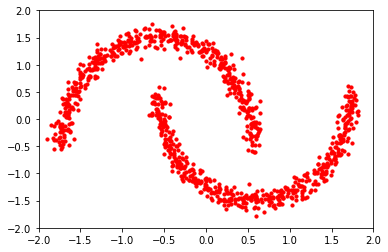

In [4]:
xlim, ylim = [-2, 2], [-2, 2]
plt.scatter(X_data[:, 0], X_data[:, 1], s=10, color='red')
plt.xlim(xlim)
plt.ylim(ylim)

In [5]:
base_dist = tfd.MultivariateNormalDiag(loc=tf.zeros([2], tf.float32), scale_diag=tf.ones([2], tf.float32))

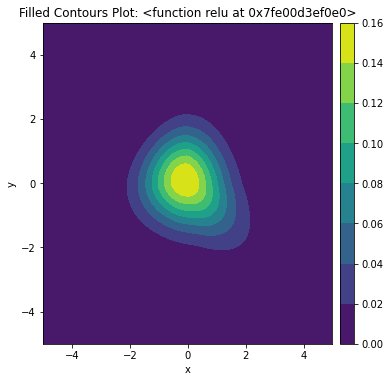

In [6]:
activation = tf.nn.relu
flow = IAF(base_dist, num_bijectors, hidden_units=[256, 256], activation=activation)
plot_contour_prob([flow], scale_fig=6, title=[activation])

In [7]:
# Make samples
names, samples = make_samples(base_dist, flow)

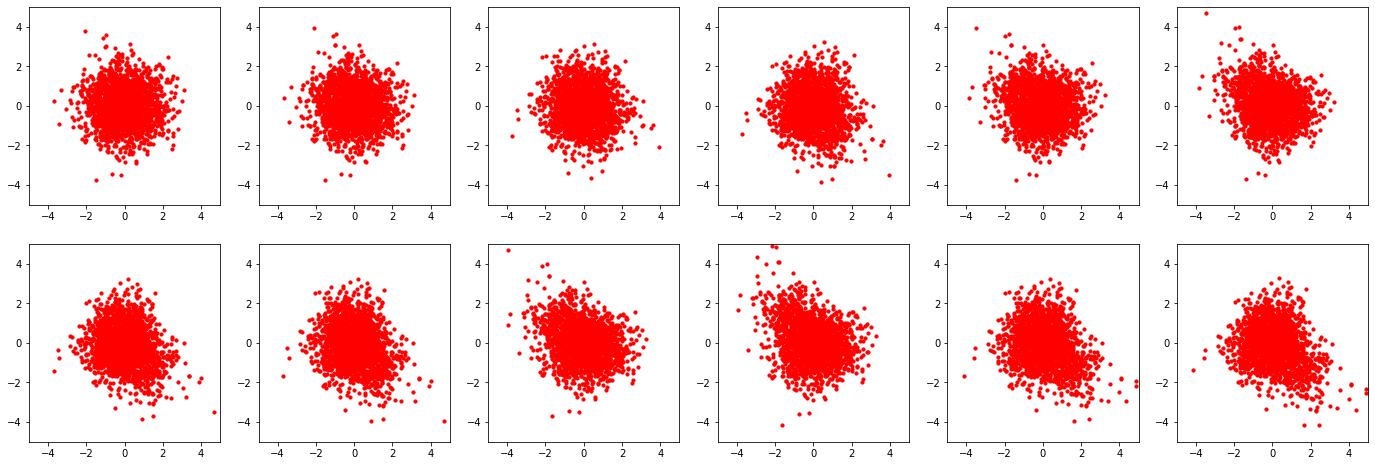

In [8]:
plot_samples(samples, names, rows=2)

# Training a IAF Bijector

steps: 0 	 loss: 2.8208203
steps: 100 	 loss: 2.033805
steps: 200 	 loss: 1.2357588
steps: 300 	 loss: 1.2963699
steps: 400 	 loss: 1.1586382
steps: 500 	 loss: 1.1322495
steps: 600 	 loss: 1.138759
steps: 700 	 loss: 1.120451
steps: 800 	 loss: 1.0946941
steps: 900 	 loss: 1.0923909


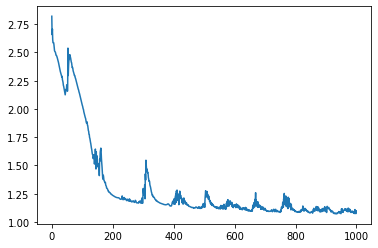

In [9]:
losses = train_dist_routine(X_data, flow, learning_rate=1e-3, steps=1000)
plt.plot(losses)

In [10]:
# Make samples
names, samples = make_samples(base_dist, flow)

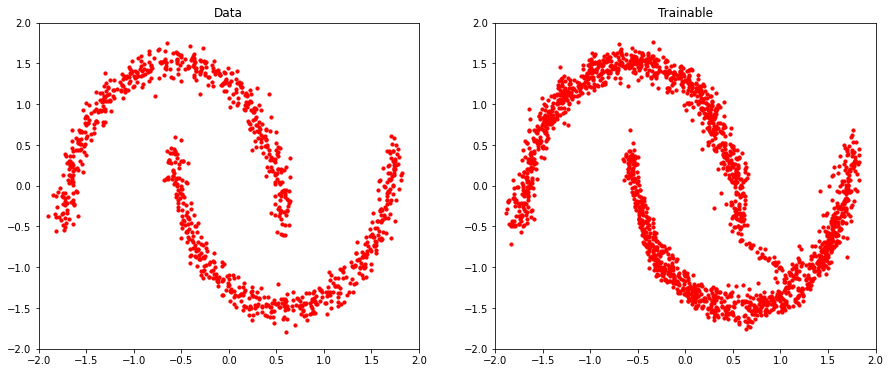

In [11]:
visualize_training_data(X_data, samples)

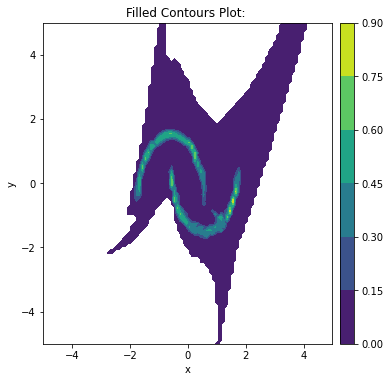

In [12]:
plot_contour_prob([flow], scale_fig=6)

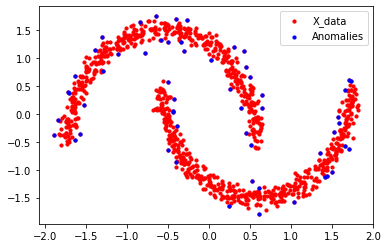

In [13]:
anomalies = detect_anomalies(threshold=0.1, data=X_data, model=flow)
label_anomalies(X_data, anomalies)